In [11]:
import pandas as pd
import numpy as np
import seaborn as sns



### Data

In [12]:
data = pd.read_csv('census.csv')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


#### Data Exploration

In [13]:
data.info() 
# no missing value so not need to do deep analysis on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [14]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

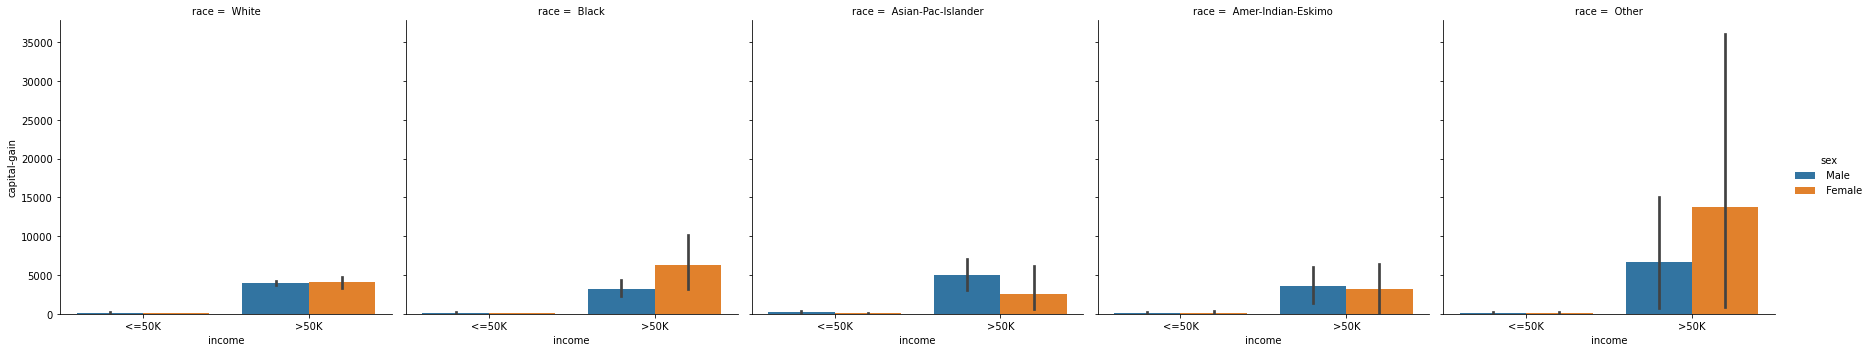

In [15]:
sns.catplot(x='income',y='capital-gain',data=data, hue='sex',col = 'race', kind='bar')
# prove capital gain for >=50K salary is higher

array([<AxesSubplot:title={'center':'education-num'}>], dtype=object)

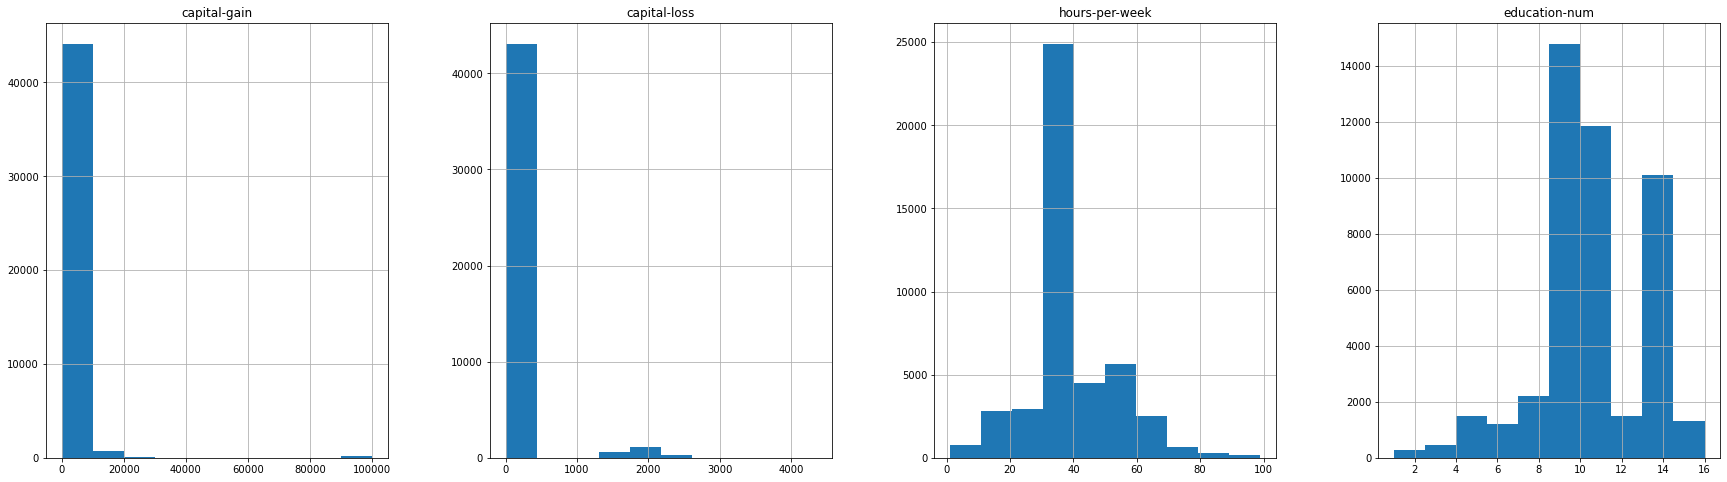

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,4, figsize=(30,8))
data.hist('capital-gain', ax=axes[0])
data.hist('capital-loss', ax=axes[1])
data.hist('hours-per-week', ax=axes[2])
data.hist('education-num', ax=axes[3])
### capital gain and capital loss has big value diff thus need to process

### Data Preprocessing

In [8]:
data.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [17]:
data['income'] = data['income'].map({'>50K':1,'<=50K':0})
data.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0


In [18]:
Y = data.iloc[:,-1]
x = data.iloc[:,:-1]
# x

In [34]:
# transform skew data
skew_columns = ['capital-gain','capital-loss']
x[skew_columns] = x[skew_columns].apply(lambda row : np.log(row+1))
x.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba


In [35]:
# normalize all numeric data (min_max scaler)

from sklearn.preprocessing import MinMaxScaler
x['age'] = x['age'].astype('float64')
numeric_category = ['age','education-num','capital-gain','capital-loss','hours-per-week']
scaler = MinMaxScaler()
x[numeric_category]= scaler.fit_transform(x[numeric_category])
x.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [36]:
#### pd_get_dummy

final_features = pd.get_dummies(x)
final_features.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.8,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.8,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Modelling

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(final_features,Y,test_size=0.2, random_state = 42)
print('xtrain shape:{}, xtest shape:{}'.format(xtrain.shape[0],xtest.shape[0]))

xtrain shape:36177, xtest shape:9045


In [67]:
#### finding suitable donar to send email, precision is more important. Instead of selecting the inccorect donar rather not to miss any high chances donar. 

# create pipeline for model training
from time import time
from sklearn.metrics import accuracy_score, fbeta_score

beta=0.5
def train_predict(model,sample_size, xtrain,ytrain, xtest,ytest):
    global result
    result= {}
    
    start = time()
    model.fit(xtrain[:sample_size], ytrain[:sample_size])
    end = time()

    result['train_time'] = end - start

    sample_size_training = 300
    start = time()
    pred_test = model.predict(xtest)
    pred_train = model.predict(xtrain[:sample_size_training])
    end = time

    # result['pred_time'] = end-start
    result['acc_train'] = accuracy_score(ytrain[:sample_size_training],pred_train)
    result['acc_test'] = accuracy_score(ytest, pred_test)
    result['f_train'] = fbeta_score(ytrain[:sample_size_training],pred_train, beta= beta)
    result['f_test'] = fbeta_score(ytest, pred_test, beta=beta)

    print("{} trained on {} samples.".format(model.__class__.__name__, sample_size))
        
    # Return the results
    return result

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


model_A = DecisionTreeClassifier()
model_B = SVC(gamma='auto')
model_C = AdaBoostClassifier()

sample_100 = int(len(ytrain))
sample_10 = int(len(ytrain) * (10/100))
sample_1 = int(len(ytrain)* (1/100))

results={}
for model in [model_A,model_B,model_C]:
    classifier_name = model.__class__.__name__
    results[classifier_name] = {}
    for samples in ([sample_100,sample_10,sample_1]):
        results[classifier_name][samples] = \
        train_predict(model, samples,xtrain,ytrain,xtest,ytest)

#  "\" contunue next line

DecisionTreeClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 361 samples.
SVC trained on 36177 samples.
SVC trained on 3617 samples.
SVC trained on 361 samples.
AdaBoostClassifier trained on 36177 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 361 samples.


In [99]:
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={36177:'100%', 3617:'10%',361:'1%'}))
    print('-------------------------')

DecisionTreeClassifier


,100%,10%,1%
train_time,0.556094,0.035031,0.003524
acc_train,0.980000,0.996667,1.000000
acc_test,0.819127,0.814704,0.812825
f_train,0.984252,0.997506,1.000000
f_test,0.644676,0.636052,0.631930


-------------------------
SVC


,100%,10%,1%
train_time,104.723755,0.480328,0.003245
acc_train,0.850000,0.846667,0.730000
acc_test,0.837369,0.825207,0.745716
f_train,0.739130,0.744337,0.000000
f_test,0.695181,0.670825,0.000000


-------------------------
AdaBoostClassifier


,100%,10%,1%
train_time,2.378554,0.272077,0.074591
acc_train,0.866667,0.870000,0.936667
acc_test,0.860697,0.855279,0.830072
f_train,0.770308,0.782609,0.896104
f_test,0.749146,0.740761,0.667145


-------------------------


### Tune Model

In [106]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer #evaluate performance based on fbeta score

selected_model = AdaBoostClassifier()

parameter = {
    'n_estimators':[50,100],
    'learning_rate':[0.1,0.5,1.0]
}

scorer = make_scorer(fbeta_score, beta = beta)

grid = GridSearchCV(selected_model, parameter,scorer)

grid_fit = grid.fit(xtrain, ytrain)

best_model = grid.best_estimator_

raw_pred = (selected_model.fit(xtrain,ytrain)).predict(xtest)
optimal_pred = best_model.predict(xtest)


    
optimum_adaboost_result = {}
for loop in ['raw','tuned']:
    optimum_adaboost_result[loop] = {}
    
optimum_adaboost_result['raw']['acc'] = accuracy_score(ytest,raw_pred)
optimum_adaboost_result['tuned']['acc'] = accuracy_score(ytest, optimal_pred)

optimum_adaboost_result['raw']['fbeta'] = fbeta_score(ytest,raw_pred, beta=beta)
optimum_adaboost_result['tuned']['fbeta'] = fbeta_score(ytest, optimal_pred, beta=beta)

display(pd.DataFrame(optimum_adaboost_result))

C:\Users\vivia\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,raw,tuned
acc,0.860697,0.864566
fbeta,0.749146,0.756634
